In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'C:\Users\Pawan\Downloads\archive\cell_images\Train'
valid_path = r'C:\Users\Pawan\Downloads\archive\cell_images\Test'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 34s 0us/step


In [6]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [14]:
from tensorflow.keras.layers import MaxPooling2D

In [15]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [37]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [38]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r"C:\Users\Pawan\Downloads\Dataset\Dataset\Train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [33]:
training_set

In [39]:
test_set = test_datagen.flow_from_directory(r"C:\Users\Pawan\Downloads\Dataset\Dataset\Test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [41]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Anaconda\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
13/13 [==============================] - 27s 2s/step - loss: 0.7850 - accuracy: 0.5938 - val_loss: 0.8291 - val_accuracy: 0.3284
Epoch 2/10
13/13 [==============================] - 15s 1s/step - loss: 0.4920 - accuracy: 0.7668 - val_loss: 1.2631 - val_accuracy: 0.3209
Epoch 3/10
13/13 [==============================] - 16s 1s/step - loss: 0.4747 - accuracy: 0.7500 - val_loss: 0.8847 - val_accuracy: 0.5149
Epoch 4/10
13/13 [==============================] - 15s 1s/step - loss: 0.4849 - accuracy: 0.7380 - val_loss: 1.1076 - val_accuracy: 0.3955
Epoch 5/10
13/13 [==============================] - 17s 1s/step - loss: 0.3370 - accuracy: 0.8438 - val_loss: 0.5503 - val_accuracy: 0.7090
Epoch 6/10
13/13 [==============================] - 14s 1s/step - loss: 0.2621 - accuracy: 0.9014 - val_loss: 0.4916 - val_accuracy: 0.7463
Epoch 7/10
13/13 [==============================] - 15s 1s/step - loss: 0.1857 - accuracy: 0.9327 - val_loss: 0.4415 - val_accuracy: 0.7910
Epoch 8/10
13/13 [==

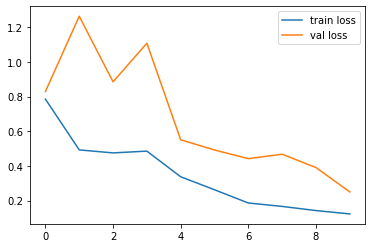

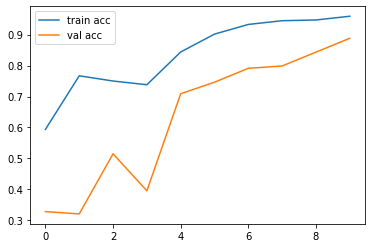

<Figure size 432x288 with 0 Axes>

In [42]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [76]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [77]:
y_pred = model.predict(test_set)

In [44]:
y_pred

array([[9.91812229e-01, 8.18778574e-03],
       [9.98255312e-01, 1.74465717e-03],
       [9.99818861e-01, 1.81176612e-04],
       [4.64789458e-02, 9.53521013e-01],
       [9.98200536e-01, 1.79943000e-03],
       [1.51333839e-01, 8.48666131e-01],
       [9.99705255e-01, 2.94772180e-04],
       [1.57610491e-01, 8.42389464e-01],
       [2.22392097e-01, 7.77607858e-01],
       [9.98272061e-01, 1.72795053e-03],
       [9.47443962e-01, 5.25560603e-02],
       [2.14176372e-01, 7.85823584e-01],
       [9.94590044e-01, 5.40991640e-03],
       [1.52605191e-01, 8.47394824e-01],
       [4.38581198e-01, 5.61418831e-01],
       [9.99410272e-01, 5.89726027e-04],
       [2.59205729e-01, 7.40794301e-01],
       [9.92285848e-01, 7.71419331e-03],
       [1.00000000e+00, 1.39148437e-09],
       [1.01779856e-01, 8.98220122e-01],
       [9.99895930e-01, 1.04005638e-04],
       [6.15541972e-02, 9.38445747e-01],
       [7.81981349e-01, 2.18018651e-01],
       [2.41091415e-01, 7.58908570e-01],
       [1.000000

In [45]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [46]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [69]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [78]:
model=load_model("model_vgg19.h5")

In [79]:
img=image.load_img(r"C:\Users\Pawan\Downloads\Dataset\Dataset\Test\Uninfected\2.png",target_size=(224,224))

In [80]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [81]:
x.shape

(224, 224, 3)

In [82]:
x=x/255

In [83]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [84]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [85]:
a=np.argmax(model.predict(img_data), axis=1)

In [88]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
